In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
# %matplotlib inline
import analysis as ana

In [2]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path =  "/Users/mohod/Developer/OTsim/otsim_data/"
    folders  = os.listdir(Path)
    # print(folders)
    for id in toFind:
        for folder in folders:
            # print(folder)
            if(folder[0] != "."):
                files=""
                # try:
                files = os.listdir(Path+folder+"/data/")
                # print(Path+folder+"/data/")
                # except Exception:
                #     print("some")
                #     pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    # print(uuid)
                    if uuid == id:
                        trajs.append([file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    return trajs

In [3]:
# getArrayRadius
def getArrayRadius(allTraj):
    ans = []
    sds = []
    # print(allTraj[1][1,:].shape)
    for traj in allTraj:
        # print(traj[0])
        radius, sd = ana.getRadius(traj[1])
        ans.append(radius)
        sds.append(sd)
    return ans,sds
def getArrayFrequency(allTraj):
    ans = []
    for traj in allTraj:
        ans.append(ana.getfreq(traj[1][:,0]))
    return np.abs(ans)
        

1 1


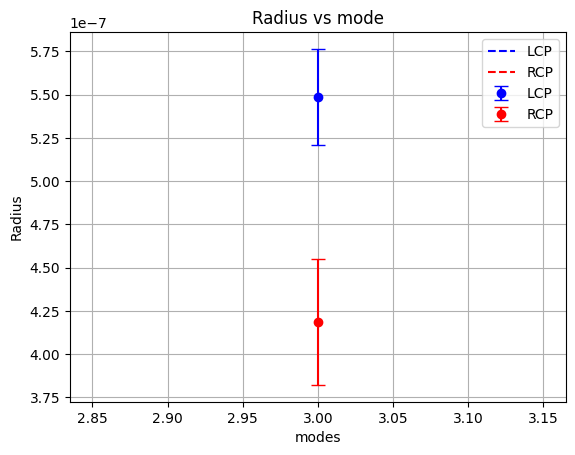

In [4]:
modes = [3]
LCP_modeVar = getArrayTraj([3464586])
RCP_modeVar = getArrayTraj([3449139])

print(len(LCP_modeVar),len(RCP_modeVar))

lcp_radius,lcp_sd = getArrayRadius(LCP_modeVar)
rcp_radius,rcp_sd = getArrayRadius(RCP_modeVar)

plt.errorbar(modes,lcp_radius,fmt="o", label ="LCP", color="blue" ,yerr=lcp_sd,capsize=5)
plt.errorbar(modes,rcp_radius, fmt="o",label ="RCP",color="red", yerr=rcp_sd,capsize=5)
plt.plot(modes,lcp_radius,"--", label ="LCP",color="blue")
plt.plot(modes,rcp_radius,"--", label ="RCP",color="red")
plt.legend()
plt.title("Radius vs mode")
plt.ylabel("Radius")
plt.xlabel("modes")
plt.grid()


#index radiLCP sdLCP radiRCP sdRCP
data=[]
for i in range(len(modes)):
      data.append(
            [modes[i],
            lcp_radius[i],
            lcp_sd[i],
            rcp_radius[i],
            rcp_sd[i]]
      )
data = np.array(data)
np.save("modeVSradius_dimer.npy",data)
plt.savefig("modeVSradius_dimer.png")


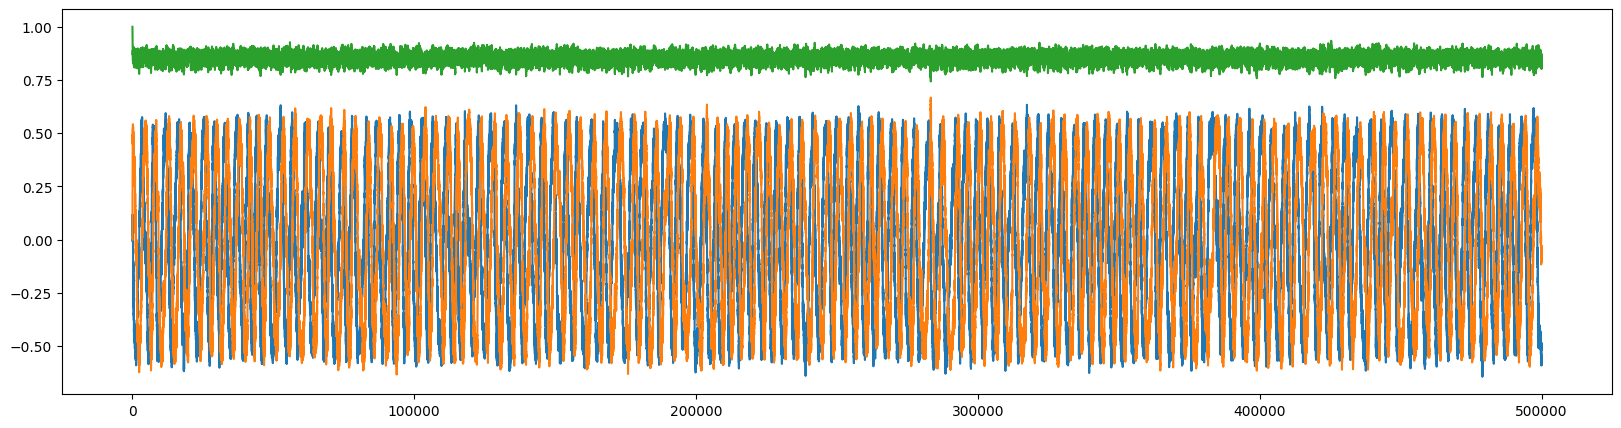

In [23]:
plt.figure(figsize=(20,5))
# plt.plot(RCP_modeVar[0][1][:,0])
# plt.plot(RCP_modeVar[0][1][:,1])
plt.plot(RCP_modeVar[0][1][:,9])
plt.plot(RCP_modeVar[0][1][:,10])
plt.plot(RCP_modeVar[0][1][:,11])

# plt.figure()
# plt.plot(LCP_modeVar[0][1][:,0])
# plt.plot(LCP_modeVar[0][1][:,1])
# plt.plot(LCP_modeVar[0][1][:,2])

# plt.xlim(0,10000)



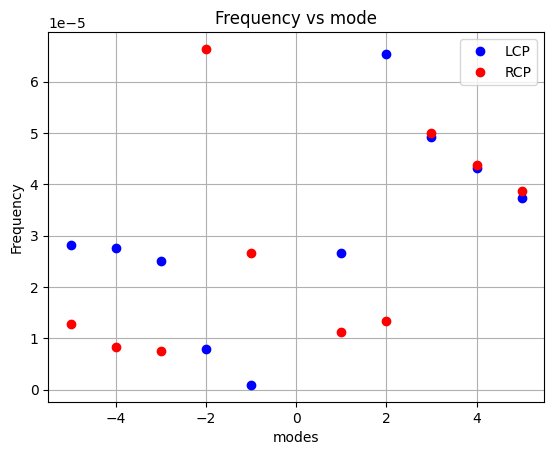

In [ ]:
lcp_freq = getArrayFrequency(LCP_modeVar)*2*np.pi*lcp_radius
rcp_freq = getArrayFrequency(RCP_modeVar)*2*np.pi*rcp_radius
plt.plot(modes,lcp_freq,"o", label ="LCP",color="blue")
plt.plot(modes,rcp_freq,"o", label ="RCP",color="red")
plt.legend()
plt.title("Frequency vs mode")
plt.ylabel("Frequency")
plt.xlabel("modes")
plt.grid()

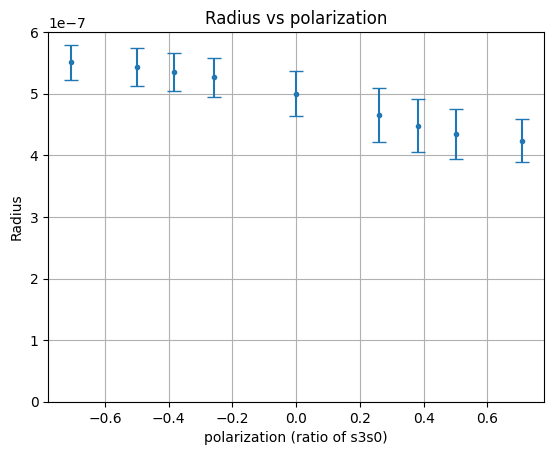

In [ ]:


# # polVar_2 = getArrayTraj([3639023,4297359,9225808,6772014,2168121,5547500,1048482,6942814,4186746]) # mode 3
# polVar_2 = getArrayTraj([3639023,4297359,9225808,6772014,2168121,5547500,1048482,6942814,4186746]) # mode2
# real_2 = np.ones(len(polVar_2))
# im_2 =np.array([-90,-60,-45,-30,0,30,45,60,90])
# im_2 =  np.exp(-1j*im_2*(np.pi/180)) 
# phi_2 = np.angle(real_2+im_2)
# s3s0_2 = np.sin(-1*phi_2)



# radius_2,sd_2 = getArrayRadius(polVar_2)


# plt.errorbar(s3s0_2,radius_2,fmt="." ,yerr=sd_2,capsize=5)
# # plt.plot(s3s0_2,radius_2,"o")
# plt.title("Radius vs polarization")
# plt.ylabel("Radius")
# plt.xlabel("polarization (ratio of s3s0)")
# plt.grid()
# plt.ylim(0,6e-7)

# #index s3s0_ratio radius sd angle_real angle_im
# data=[]
# for i in range(len(s3s0_2)):
#       data.append(
#             [s3s0_2[i],
#             radius_2[i],
#             sd_2[i],
#             real_2[i],
#             im_2[i]]
#       )
# data = np.array(data)
# np.save("polarizationVSradius_dimer.npy",data)
# plt.savefig("polarizationVSradius_dimer.png")


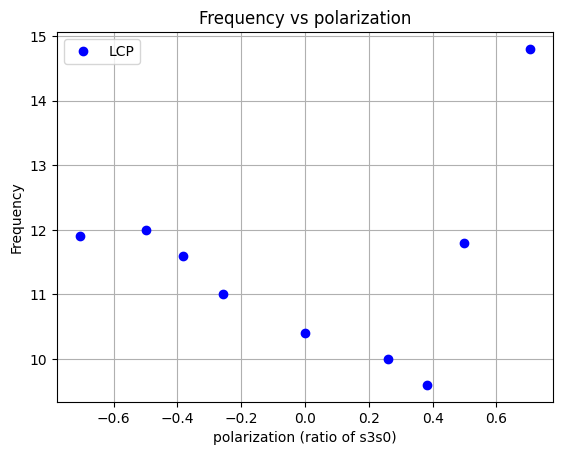

In [ ]:

# # polVar_2 = getArrayTraj([3639023,4297359,9225808,6772014,2168121,5547500,1048482,6942814,4186746]) # mode 3
# polVar_2 = getArrayTraj([2966653,1819638,2698496,6544515,2380057,7005554,7188528,2682020,9505016]) # mode 2

# real_2 = np.ones(len(polVar_2))
# im_2 =np.array([-90,-60,-45,-30,0,30,45,60,90])
# im_2 =  np.exp(-1j*im_2*(np.pi/180)) 
# phi_2 = np.angle(real_2+im_2)
# s3s0_2 = np.sin(-1*phi_2)




# # radius_2,sd_2 = getArrayRadius(polVar_2)


# pol_freq = getArrayFrequency(polVar_2)
# plt.plot(s3s0_2,pol_freq,"o", label ="LCP",color="blue")
# plt.legend()
# plt.title("Frequency vs polarization")
# plt.ylabel("Frequency")
# plt.xlabel("polarization (ratio of s3s0)")
# plt.grid()